In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("covidcast_new.csv")
data.head()

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d
0,1/7/2021,1000,34.412959,12.541558,1.464798,65.771681,22.086274,52.854667,29.288429,30.487852,57.334785,3.244379,2.6382,28.469582,18.571266,9.482316,24.962112,84.311759,12.627098
1,1/7/2021,1003,32.814153,10.189340,1.270183,61.516584,25.179399,51.160278,NaN,28.384842,53.172285,1.199572,NaN,27.532881,23.406516,8.933682,28.864558,82.778220,11.727249
2,1/7/2021,1015,35.621311,14.591271,6.594649,NaN,NaN,54.503711,NaN,37.003522,NaN,3.890709,NaN,NaN,20.974363,NaN,NaN,NaN,13.255336
3,1/7/2021,1051,40.453615,14.164503,3.320922,68.718538,19.438763,54.948755,NaN,37.637900,67.550815,3.284647,NaN,30.223647,20.009477,7.570250,26.494057,86.587182,13.823318
4,1/7/2021,1069,39.228766,10.103564,0.288897,59.961036,23.065494,60.118290,NaN,36.156326,55.995745,1.881970,NaN,30.806929,16.574756,12.916249,24.747620,85.825453,10.258936


In [4]:
df = pd.DataFrame(data)

missing_values = df.isnull().sum()

print(missing_values)

time_value                                  0
geo_value                                   0
smoothed_wspent_time_1d                   560
smoothed_wtested_14d                      938
smoothed_wpublic_transit_1d               560
smoothed_wworried_become_ill             3111
smoothed_wvaccine_likely_govt_health     4369
smoothed_wshop_1d                         560
smoothed_wtested_positive_14d           21632
smoothed_wwork_outside_home_1d            560
smoothed_wothers_masked                  3529
smoothed_wcli                             145
smoothed_wcovid_vaccinated               2602
smoothed_wvaccine_likely_friends         4260
smoothed_wrestaurant_1d                   560
smoothed_wvaccine_likely_politicians     4503
smoothed_wvaccine_likely_who             4356
smoothed_wwearing_mask                   3641
smoothed_wlarge_event_1d                  560
dtype: int64


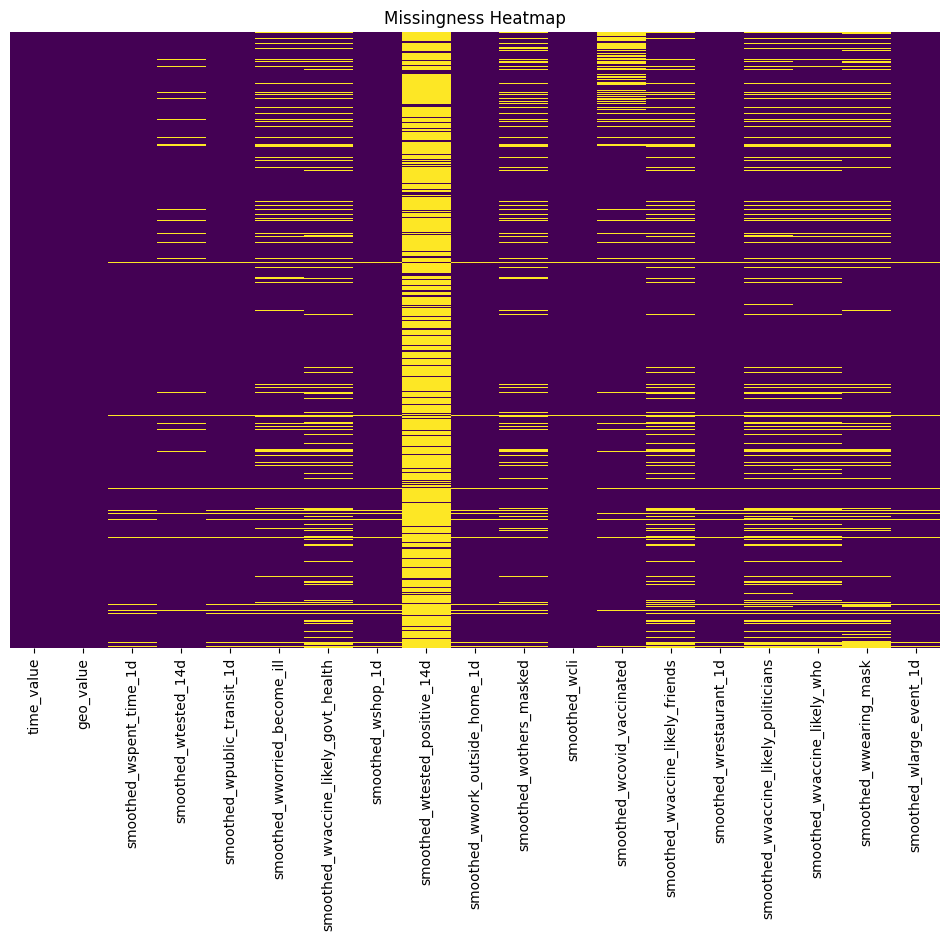

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missingness Heatmap')
plt.show()

In [6]:
# Subset 1: Data related to smoothed_wtested_positive_14d
subset_tested_positive = df.drop(columns=['smoothed_wcovid_vaccinated'])

# Subset 2: Data related to smoothed_wcovid_vaccinated
subset_vaccinated = df.drop(columns=['smoothed_wtested_positive_14d'])

In [7]:
subset_tested_positive.head()

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d
0,1/7/2021,1000,34.412959,12.541558,1.464798,65.771681,22.086274,52.854667,29.288429,30.487852,57.334785,3.244379,28.469582,18.571266,9.482316,24.962112,84.311759,12.627098
1,1/7/2021,1003,32.814153,10.189340,1.270183,61.516584,25.179399,51.160278,NaN,28.384842,53.172285,1.199572,27.532881,23.406516,8.933682,28.864558,82.778220,11.727249
2,1/7/2021,1015,35.621311,14.591271,6.594649,NaN,NaN,54.503711,NaN,37.003522,NaN,3.890709,NaN,20.974363,NaN,NaN,NaN,13.255336
3,1/7/2021,1051,40.453615,14.164503,3.320922,68.718538,19.438763,54.948755,NaN,37.637900,67.550815,3.284647,30.223647,20.009477,7.570250,26.494057,86.587182,13.823318
4,1/7/2021,1069,39.228766,10.103564,0.288897,59.961036,23.065494,60.118290,NaN,36.156326,55.995745,1.881970,30.806929,16.574756,12.916249,24.747620,85.825453,10.258936


In [8]:
subset_vaccinated.head()

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d
0,1/7/2021,1000,34.412959,12.541558,1.464798,65.771681,22.086274,52.854667,30.487852,57.334785,3.244379,2.6382,28.469582,18.571266,9.482316,24.962112,84.311759,12.627098
1,1/7/2021,1003,32.814153,10.189340,1.270183,61.516584,25.179399,51.160278,28.384842,53.172285,1.199572,NaN,27.532881,23.406516,8.933682,28.864558,82.778220,11.727249
2,1/7/2021,1015,35.621311,14.591271,6.594649,NaN,NaN,54.503711,37.003522,NaN,3.890709,NaN,NaN,20.974363,NaN,NaN,NaN,13.255336
3,1/7/2021,1051,40.453615,14.164503,3.320922,68.718538,19.438763,54.948755,37.637900,67.550815,3.284647,NaN,30.223647,20.009477,7.570250,26.494057,86.587182,13.823318
4,1/7/2021,1069,39.228766,10.103564,0.288897,59.961036,23.065494,60.118290,36.156326,55.995745,1.881970,NaN,30.806929,16.574756,12.916249,24.747620,85.825453,10.258936


In [9]:
# Drop rows where the target smoothed_wtested_positive_14d is missing
subset_tested_positive_cleaned = subset_tested_positive.dropna(subset=['smoothed_wtested_positive_14d'])

In [12]:
missing_values = subset_tested_positive_cleaned.isnull().sum()
print(missing_values)

time_value                                0
geo_value                                 0
smoothed_wspent_time_1d                 121
smoothed_wtested_14d                    115
smoothed_wpublic_transit_1d             121
smoothed_wworried_become_ill             91
smoothed_wvaccine_likely_govt_health     91
smoothed_wshop_1d                       121
smoothed_wtested_positive_14d             0
smoothed_wwork_outside_home_1d          121
smoothed_wothers_masked                  95
smoothed_wcli                           135
smoothed_wvaccine_likely_friends         91
smoothed_wrestaurant_1d                 121
smoothed_wvaccine_likely_politicians     90
smoothed_wvaccine_likely_who             88
smoothed_wwearing_mask                   95
smoothed_wlarge_event_1d                121
dtype: int64


In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Drop target from features
X = subset_tested_positive_cleaned.drop(columns=['time_value', 'geo_value', 'smoothed_wtested_positive_14d'])

# Apply iterative imputation
iter_imputer = IterativeImputer(random_state=42)
X_imputed = iter_imputer.fit_transform(X)

# Convert back to DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Reattach non-numeric columns and target
X_imputed['time_value'] = subset_tested_positive_cleaned['time_value'].values
X_imputed['geo_value'] = subset_tested_positive_cleaned['geo_value'].values
X_imputed['smoothed_wtested_positive_14d'] = subset_tested_positive_cleaned['smoothed_wtested_positive_14d'].values

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [13]:
missing_values = X_imputed.isnull().sum()
print(missing_values)

smoothed_wspent_time_1d                 0
smoothed_wtested_14d                    0
smoothed_wpublic_transit_1d             0
smoothed_wworried_become_ill            0
smoothed_wvaccine_likely_govt_health    0
smoothed_wshop_1d                       0
smoothed_wwork_outside_home_1d          0
smoothed_wothers_masked                 0
smoothed_wcli                           0
smoothed_wvaccine_likely_friends        0
smoothed_wrestaurant_1d                 0
smoothed_wvaccine_likely_politicians    0
smoothed_wvaccine_likely_who            0
smoothed_wwearing_mask                  0
smoothed_wlarge_event_1d                0
time_value                              0
geo_value                               0
smoothed_wtested_positive_14d           0
dtype: int64


In [ ]:
X_imputed.head()

,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,time_value,geo_value,smoothed_wtested_positive_14d
0,34.412959,12.541558,1.464798,65.771681,22.086274,52.854667,30.487852,57.334785,3.244379,28.469582,18.571266,9.482316,24.962112,84.311759,12.627098,1/7/2021,1000,29.288429
1,31.031930,23.187988,5.247612,54.332976,31.829591,52.948188,31.242179,65.756589,0.421245,29.240819,13.132258,10.050320,33.168119,82.025101,9.231545,1/7/2021,2000,8.843686
2,33.894471,15.813525,1.670934,70.449040,30.601786,52.224064,26.614385,64.266832,1.401254,38.028305,18.465710,11.358013,33.428347,87.570662,9.285851,1/7/2021,4000,30.302464
3,30.674532,16.170044,3.106310,68.928567,32.197435,50.983665,24.467235,84.360238,2.082898,34.448458,17.593056,11.658930,38.405013,92.846578,9.364862,1/7/2021,4013,22.710935
4,30.489939,16.193151,2.943076,69.579201,36.636282,52.706816,24.371077,87.764291,1.306140,36.117471,13.814072,14.057577,42.917359,93.671275,6.418342,1/7/2021,4019,21.912277


In [ ]:
X_imputed.describe()


,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,geo_value,smoothed_wtested_positive_14d
count,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000
mean,29.528301,15.689972,3.948453,70.512203,32.990957,52.651930,31.857574,82.081018,1.057850,35.658769,13.261384,11.179269,37.859727,92.487281,7.259060,26665.803205,17.250770
std,6.078821,5.021834,5.069944,5.342795,7.406276,4.760410,5.431032,13.337357,0.501558,4.763887,5.442309,3.581332,7.946038,5.466456,3.791994,15971.575875,7.419522
min,14.410554,5.437303,-1.219461,52.405818,17.410006,39.237833,14.558697,42.950717,0.000000,22.622258,0.424278,2.123555,20.127120,74.543138,0.632336,1000.000000,1.548609
25%,25.191114,11.887107,1.883732,67.381429,27.092817,49.328735,28.131752,73.685191,0.697890,32.009506,8.924577,8.471477,31.403928,88.633403,4.158298,12000.000000,11.616797
50%,29.350245,14.725937,2.589248,70.840632,32.932142,52.135878,31.795566,87.670324,0.989518,35.560135,13.183800,10.811961,38.041010,94.754405,6.548203,26125.000000,16.530456
75%,33.410988,18.672451,3.652200,74.319869,38.322269,55.635347,35.339114,92.355412,1.341444,39.002385,17.622601,13.436859,43.760696,96.688925,9.848476,39000.000000,22.153012
max,49.831174,34.951317,36.015469,85.446476,53.992167,67.597229,49.848038,99.319623,3.356476,54.182794,28.340772,25.197001,58.742213,99.732673,22.619464,55025.000000,46.644291


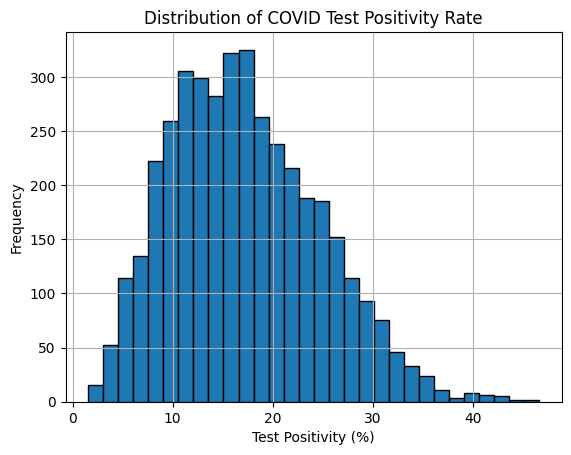

In [ ]:
plt.hist(X_imputed['smoothed_wtested_positive_14d'], bins=30, edgecolor='black')
plt.title('Distribution of COVID Test Positivity Rate')
plt.xlabel('Test Positivity (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

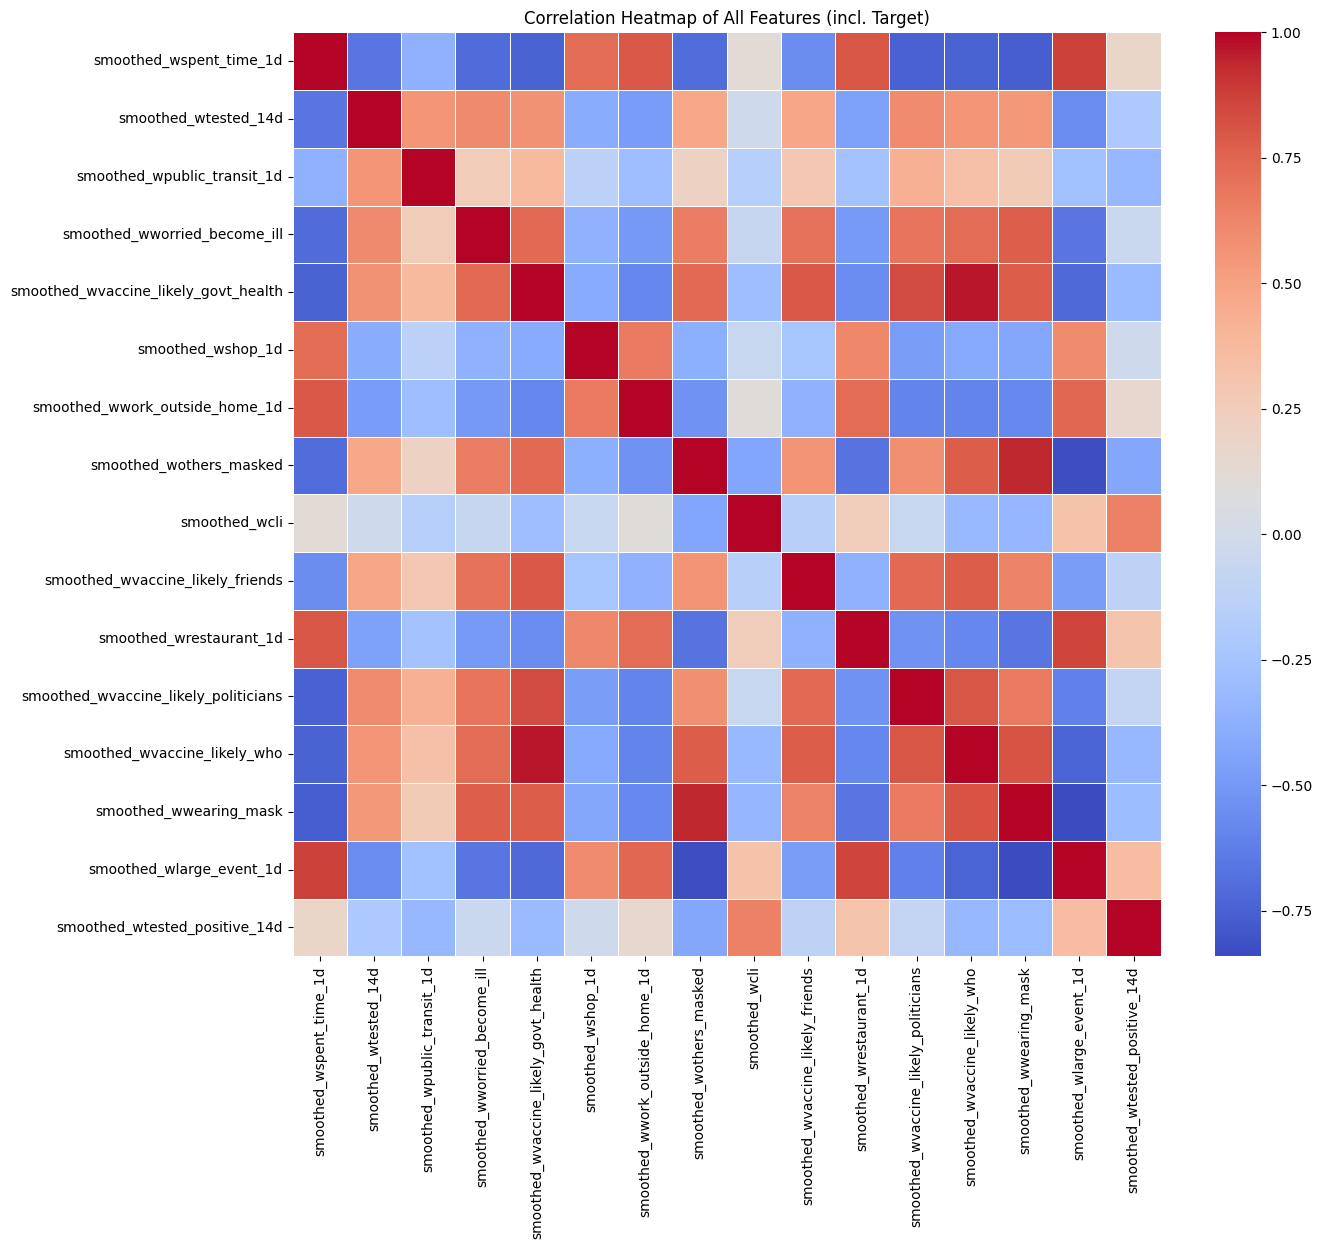

In [ ]:
corr_matrix = X_imputed.drop(columns=['geo_value', 'time_value']).corr()

# Set up the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of All Features (incl. Target)")
plt.show()

In [ ]:
features_only = X_imputed.drop(columns=['time_value', 'geo_value', 'smoothed_wtested_positive_14d'])

# Compute correlation matrix
corr_matrix = features_only.corr().abs()

# Mask the diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix_masked = corr_matrix.mask(mask)

# Find pairs with correlation > 0.85
high_corr_pairs = corr_matrix_masked.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.85]

print(high_corr_pairs.sort_values(by='Correlation', ascending=False))

                        Feature 1                             Feature 2  \
70   smoothed_wvaccine_likely_who  smoothed_wvaccine_likely_govt_health   
85         smoothed_wwearing_mask               smoothed_wothers_masked   
91       smoothed_wlarge_event_1d               smoothed_wspent_time_1d   
101      smoothed_wlarge_event_1d               smoothed_wrestaurant_1d   

     Correlation  
70      0.970065  
85      0.939722  
91      0.871260  
101     0.861892  


In [ ]:
columns_to_drop = [
    'smoothed_wvaccine_likely_govt_health',
    'smoothed_wothers_masked',
    'smoothed_wspent_time_1d'
]

X_reduced = X_imputed.drop(columns=columns_to_drop)

In [ ]:
X_reduced.head()

,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,smoothed_wcli,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,time_value,geo_value,smoothed_wtested_positive_14d
0,12.541558,1.464798,65.771681,52.854667,30.487852,3.244379,28.469582,18.571266,9.482316,24.962112,84.311759,12.627098,1/7/2021,1000,29.288429
1,23.187988,5.247612,54.332976,52.948188,31.242179,0.421245,29.240819,13.132258,10.050320,33.168119,82.025101,9.231545,1/7/2021,2000,8.843686
2,15.813525,1.670934,70.449040,52.224064,26.614385,1.401254,38.028305,18.465710,11.358013,33.428347,87.570662,9.285851,1/7/2021,4000,30.302464
3,16.170044,3.106310,68.928567,50.983665,24.467235,2.082898,34.448458,17.593056,11.658930,38.405013,92.846578,9.364862,1/7/2021,4013,22.710935
4,16.193151,2.943076,69.579201,52.706816,24.371077,1.306140,36.117471,13.814072,14.057577,42.917359,93.671275,6.418342,1/7/2021,4019,21.912277


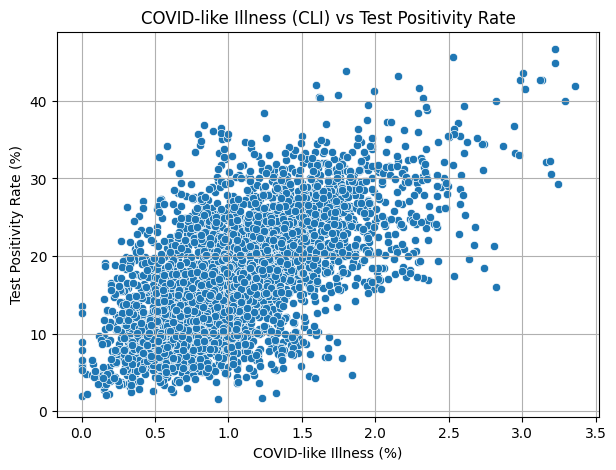

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=X_reduced,
    x='smoothed_wcli',
    y='smoothed_wtested_positive_14d'
)
plt.title('COVID-like Illness (CLI) vs Test Positivity Rate')
plt.xlabel('COVID-like Illness (%)')
plt.ylabel('Test Positivity Rate (%)')
plt.grid(True)
plt.show()

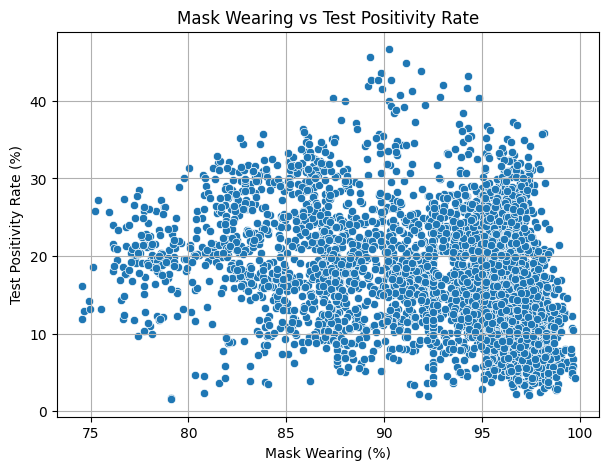

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=X_reduced,
    x='smoothed_wwearing_mask',
    y='smoothed_wtested_positive_14d'
)
plt.title('Mask Wearing vs Test Positivity Rate')
plt.xlabel('Mask Wearing (%)')
plt.ylabel('Test Positivity Rate (%)')
plt.grid(True)
plt.show()

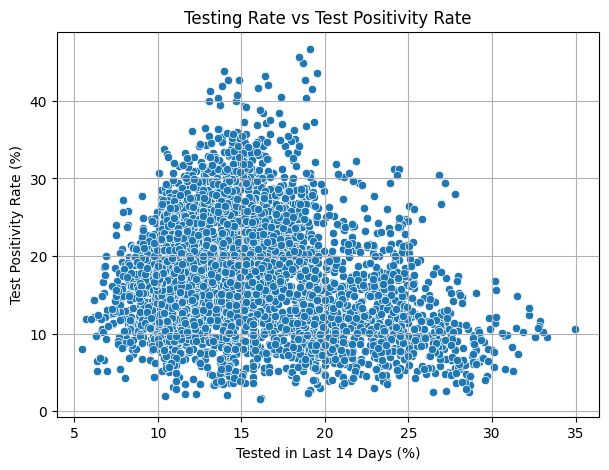

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=X_reduced,
    x='smoothed_wtested_14d',
    y='smoothed_wtested_positive_14d'
)
plt.title('Testing Rate vs Test Positivity Rate')
plt.xlabel('Tested in Last 14 Days (%)')
plt.ylabel('Test Positivity Rate (%)')
plt.grid(True)
plt.show()

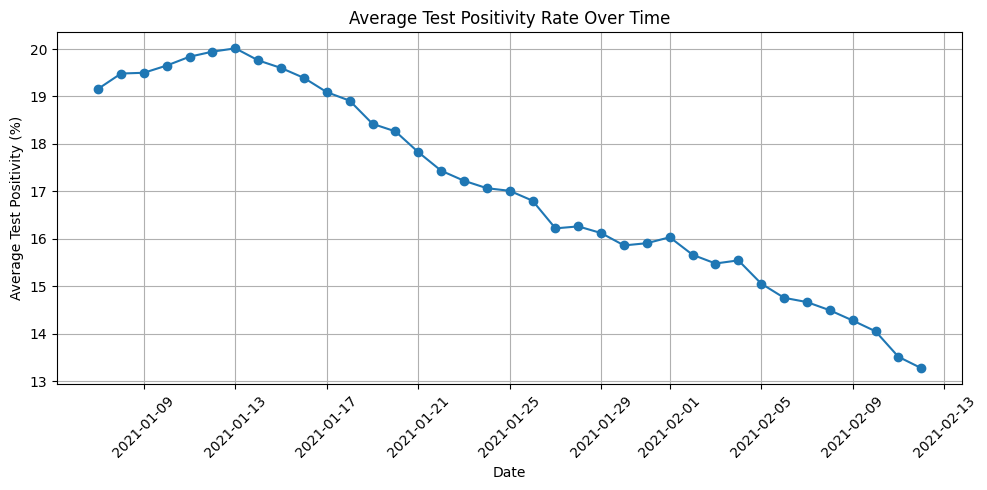

In [ ]:
X_reduced['time_value'] = pd.to_datetime(X_reduced['time_value'])

# Group by date and compute average positivity rate
trend = X_reduced.groupby('time_value')['smoothed_wtested_positive_14d'].mean()

# Plot
plt.figure(figsize=(10,5))
plt.plot(trend.index, trend.values, marker='o')
plt.title('Average Test Positivity Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Average Test Positivity (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

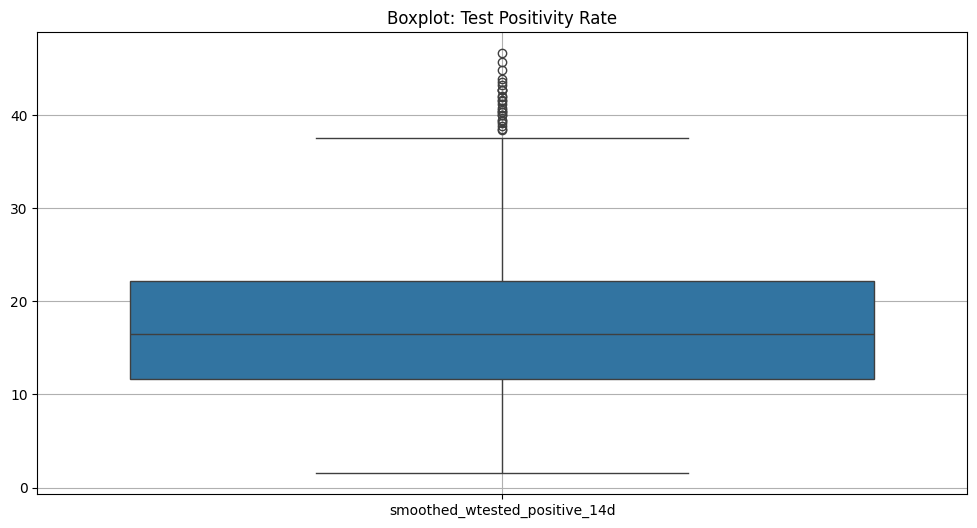

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X_reduced[['smoothed_wtested_positive_14d']])
plt.title('Boxplot: Test Positivity Rate')
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import zscore

z_scores = np.abs(zscore(X_reduced.select_dtypes(include='number')))
outliers = (z_scores > 3).sum(axis=0).sort_values(ascending=False)

print("Number of outliers per column (Z > 3):")
print(outliers[outliers > 0])

Number of outliers per column (Z > 3):
smoothed_wpublic_transit_1d             156
smoothed_wcli                            38
smoothed_wvaccine_likely_politicians     21
smoothed_wtested_positive_14d            20
smoothed_wtested_14d                     18
smoothed_wworried_become_ill             16
smoothed_wvaccine_likely_friends         16
smoothed_wlarge_event_1d                 11
smoothed_wwearing_mask                   10
smoothed_wwork_outside_home_1d            9
smoothed_wshop_1d                         3
dtype: int64


In [ ]:
X_reduced['smoothed_wpublic_transit_1d'] = X_reduced['smoothed_wpublic_transit_1d'].clip(lower=0, upper=100)

In [ ]:
target = 'smoothed_wtested_positive_14d'
non_features = ['time_value', 'geo_value', target]
features = [col for col in X_reduced.columns if col not in non_features]
print("Selected features for COVID positivity prediction:")
print(features)

Selected features for COVID positivity prediction:
['smoothed_wtested_14d', 'smoothed_wpublic_transit_1d', 'smoothed_wworried_become_ill', 'smoothed_wshop_1d', 'smoothed_wwork_outside_home_1d', 'smoothed_wcli', 'smoothed_wvaccine_likely_friends', 'smoothed_wrestaurant_1d', 'smoothed_wvaccine_likely_politicians', 'smoothed_wvaccine_likely_who', 'smoothed_wwearing_mask', 'smoothed_wlarge_event_1d']


In [ ]:
subset_vaccinated.head()

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d
0,1/7/2021,1000,34.412959,12.541558,1.464798,65.771681,22.086274,52.854667,30.487852,57.334785,3.244379,2.6382,28.469582,18.571266,9.482316,24.962112,84.311759,12.627098
1,1/7/2021,1003,32.814153,10.189340,1.270183,61.516584,25.179399,51.160278,28.384842,53.172285,1.199572,NaN,27.532881,23.406516,8.933682,28.864558,82.778220,11.727249
2,1/7/2021,1015,35.621311,14.591271,6.594649,NaN,NaN,54.503711,37.003522,NaN,3.890709,NaN,NaN,20.974363,NaN,NaN,NaN,13.255336
3,1/7/2021,1051,40.453615,14.164503,3.320922,68.718538,19.438763,54.948755,37.637900,67.550815,3.284647,NaN,30.223647,20.009477,7.570250,26.494057,86.587182,13.823318
4,1/7/2021,1069,39.228766,10.103564,0.288897,59.961036,23.065494,60.118290,36.156326,55.995745,1.881970,NaN,30.806929,16.574756,12.916249,24.747620,85.825453,10.258936


In [ ]:
subset_vaccinated_cleaned = subset_vaccinated.dropna(subset=['smoothed_wcovid_vaccinated'])

In [ ]:
subset_vaccinated_cleaned.isnull().sum().sort_values(ascending=False)

,0
smoothed_wvaccine_likely_politicians,3206
smoothed_wvaccine_likely_govt_health,3088
smoothed_wvaccine_likely_who,3087
smoothed_wvaccine_likely_friends,3029
smoothed_wwearing_mask,2266
smoothed_wothers_masked,2076
smoothed_wworried_become_ill,1708
smoothed_wwork_outside_home_1d,174
smoothed_wrestaurant_1d,174
smoothed_wspent_time_1d,174


In [ ]:
X_vaccine = subset_vaccinated_cleaned.drop(columns=['time_value', 'geo_value', 'smoothed_wcovid_vaccinated'])

# Impute
iter_imputer = IterativeImputer(random_state=42)
X_vaccine_imputed = iter_imputer.fit_transform(X_vaccine)

# Convert back to DataFrame
X_vaccine_imputed = pd.DataFrame(X_vaccine_imputed, columns=X_vaccine.columns)

# Reattach time, geo, and target
X_vaccine_imputed['time_value'] = subset_vaccinated_cleaned['time_value'].values
X_vaccine_imputed['geo_value'] = subset_vaccinated_cleaned['geo_value'].values
X_vaccine_imputed['smoothed_wcovid_vaccinated'] = subset_vaccinated_cleaned['smoothed_wcovid_vaccinated'].values

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
z_scores_vax = np.abs(zscore(X_vaccine_imputed.select_dtypes(include='number')))
outliers_vax = (z_scores_vax > 3).sum(axis=0)

print("Number of outliers per column (Z > 3):")
print(pd.Series(outliers_vax, index=X_vaccine_imputed.select_dtypes(include='number').columns).sort_values(ascending=False))

Number of outliers per column (Z > 3):
smoothed_wpublic_transit_1d             333
smoothed_wwearing_mask                  276
smoothed_wothers_masked                 274
smoothed_wtested_14d                    265
smoothed_wcli                           237
smoothed_wvaccine_likely_politicians    176
smoothed_wlarge_event_1d                162
smoothed_wcovid_vaccinated              159
smoothed_wworried_become_ill            127
smoothed_wvaccine_likely_friends        125
smoothed_wspent_time_1d                  90
smoothed_wwork_outside_home_1d           80
smoothed_wshop_1d                        73
smoothed_wvaccine_likely_govt_health     72
smoothed_wrestaurant_1d                  38
smoothed_wvaccine_likely_who             27
geo_value                                 0
dtype: int64


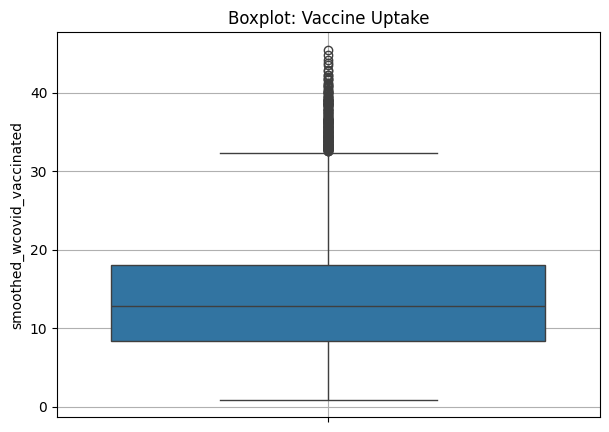

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(y=X_vaccine_imputed['smoothed_wcovid_vaccinated'])
plt.title('Boxplot: Vaccine Uptake')
plt.grid(True)
plt.show()

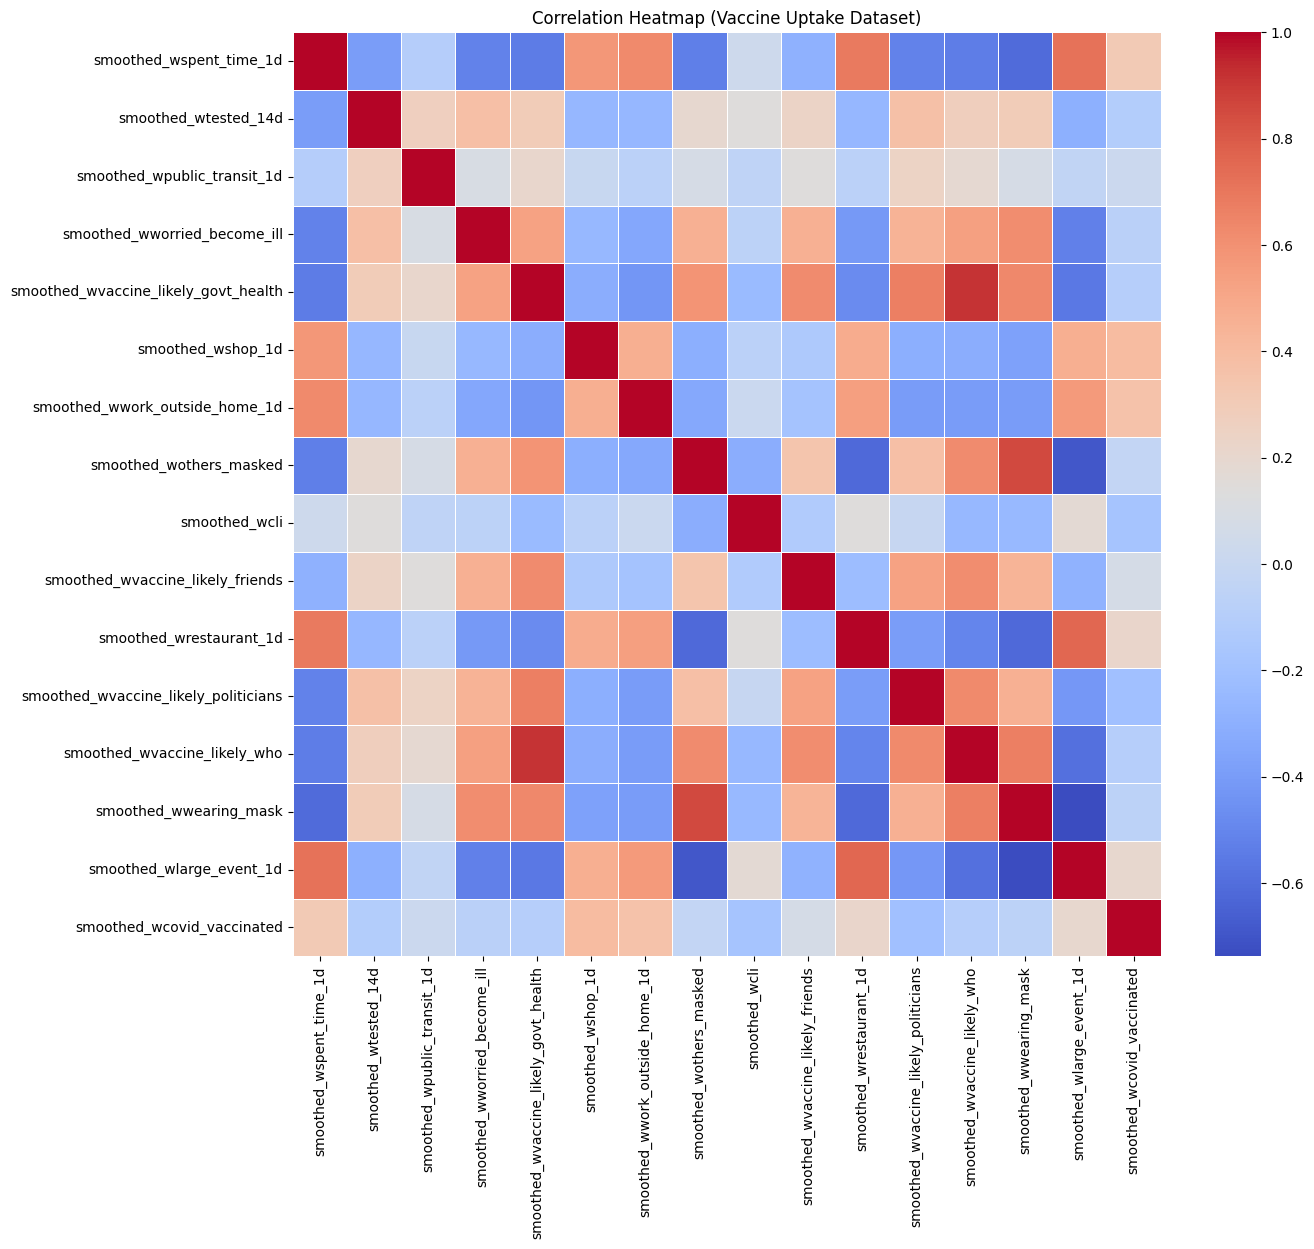

In [ ]:
corr_matrix_vax = X_vaccine_imputed.drop(columns=['time_value', 'geo_value']).corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix_vax, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap (Vaccine Uptake Dataset)")
plt.show()

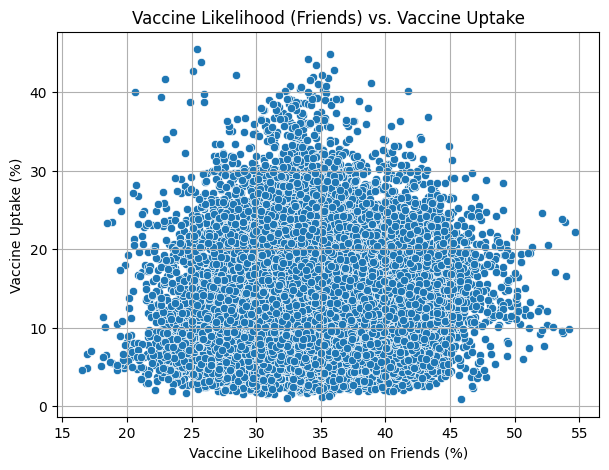

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=X_vaccine_imputed,
    x='smoothed_wvaccine_likely_friends',
    y='smoothed_wcovid_vaccinated'
)
plt.title('Vaccine Likelihood (Friends) vs. Vaccine Uptake')
plt.xlabel('Vaccine Likelihood Based on Friends (%)')
plt.ylabel('Vaccine Uptake (%)')
plt.grid(True)
plt.show()

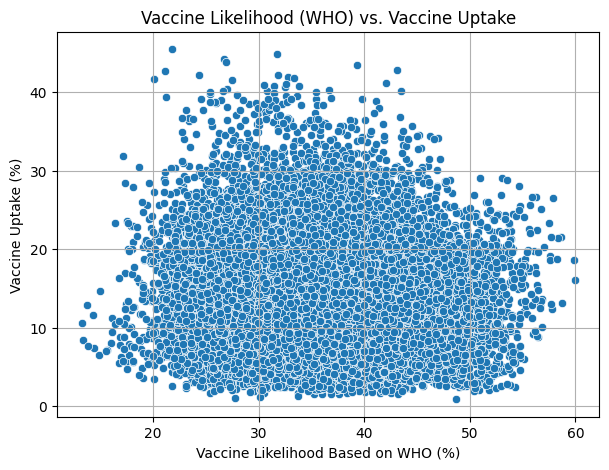

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=X_vaccine_imputed,
    x='smoothed_wvaccine_likely_who',
    y='smoothed_wcovid_vaccinated'
)
plt.title('Vaccine Likelihood (WHO) vs. Vaccine Uptake')
plt.xlabel('Vaccine Likelihood Based on WHO (%)')
plt.ylabel('Vaccine Uptake (%)')
plt.grid(True)
plt.show()

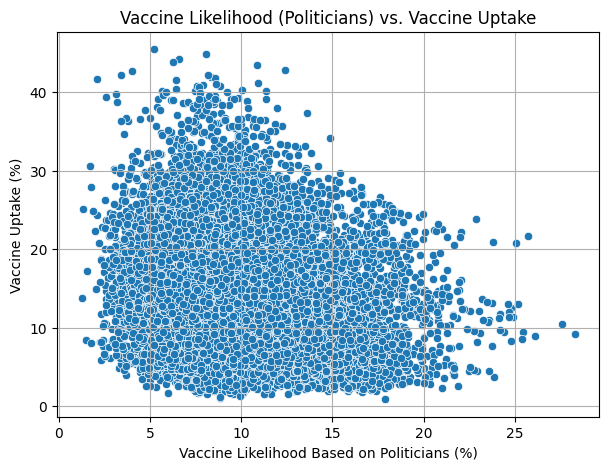

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=X_vaccine_imputed,
    x='smoothed_wvaccine_likely_politicians',
    y='smoothed_wcovid_vaccinated'
)
plt.title('Vaccine Likelihood (Politicians) vs. Vaccine Uptake')
plt.xlabel('Vaccine Likelihood Based on Politicians (%)')
plt.ylabel('Vaccine Uptake (%)')
plt.grid(True)
plt.show()

In [ ]:
corr_vax = X_vaccine_imputed.drop(columns=['time_value', 'geo_value']).corr()['smoothed_wcovid_vaccinated']
corr_vax_sorted = corr_vax.drop('smoothed_wcovid_vaccinated').sort_values(ascending=False)

# Display correlations with target
print("Features ranked by correlation with vaccine uptake:")
print(corr_vax_sorted)

Features ranked by correlation with vaccine uptake:
smoothed_wshop_1d                       0.397100
smoothed_wwork_outside_home_1d          0.359244
smoothed_wspent_time_1d                 0.308489
smoothed_wrestaurant_1d                 0.216288
smoothed_wlarge_event_1d                0.200239
smoothed_wvaccine_likely_friends        0.075698
smoothed_wpublic_transit_1d             0.019600
smoothed_wothers_masked                -0.028594
smoothed_wwearing_mask                 -0.059607
smoothed_wworried_become_ill           -0.073797
smoothed_wvaccine_likely_govt_health   -0.095149
smoothed_wvaccine_likely_who           -0.095833
smoothed_wtested_14d                   -0.108434
smoothed_wcli                          -0.180831
smoothed_wvaccine_likely_politicians   -0.207360
Name: smoothed_wcovid_vaccinated, dtype: float64


In [ ]:
drop_features = [
    'smoothed_wpublic_transit_1d',
    'smoothed_wothers_masked',
    'smoothed_wwearing_mask',
    'smoothed_wworried_become_ill',
    'smoothed_wvaccine_likely_govt_health',
    'smoothed_wvaccine_likely_who',
    'smoothed_wtested_14d',
    'smoothed_wcli',
    'smoothed_wvaccine_likely_politicians'
]

X_vax_final = X_vaccine_imputed.drop(columns=drop_features)

In [ ]:
features_only_vax = X_vax_final.drop(columns=['smoothed_wcovid_vaccinated', 'time_value', 'geo_value'])

# Compute absolute correlation matrix
corr_matrix = features_only_vax.corr().abs()

# Mask the upper triangle (including diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix_masked = corr_matrix.mask(mask)

# Extract high correlation pairs
high_corr_pairs = corr_matrix_masked.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.85]

# Sort and display
print(high_corr_pairs.sort_values(by='Correlation', ascending=False))

Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


In [ ]:
# Rename for test positivity
df_clean_test_positivity = X_reduced

# Rename for vaccine uptake
df_clean_vaccine_uptake = X_vax_final

In [ ]:
df_clean_test_positivity.head()

,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,smoothed_wcli,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,time_value,geo_value,smoothed_wtested_positive_14d
0,12.541558,1.464798,65.771681,52.854667,30.487852,3.244379,28.469582,18.571266,9.482316,24.962112,84.311759,12.627098,2021-01-07,1000,29.288429
1,23.187988,5.247612,54.332976,52.948188,31.242179,0.421245,29.240819,13.132258,10.050320,33.168119,82.025101,9.231545,2021-01-07,2000,8.843686
2,15.813525,1.670934,70.449040,52.224064,26.614385,1.401254,38.028305,18.465710,11.358013,33.428347,87.570662,9.285851,2021-01-07,4000,30.302464
3,16.170044,3.106310,68.928567,50.983665,24.467235,2.082898,34.448458,17.593056,11.658930,38.405013,92.846578,9.364862,2021-01-07,4013,22.710935
4,16.193151,2.943076,69.579201,52.706816,24.371077,1.306140,36.117471,13.814072,14.057577,42.917359,93.671275,6.418342,2021-01-07,4019,21.912277


In [ ]:
df_clean_vaccine_uptake.head()

,smoothed_wspent_time_1d,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wlarge_event_1d,time_value,geo_value,smoothed_wcovid_vaccinated
0,34.412959,52.854667,30.487852,28.469582,18.571266,12.627098,2021-01-07,1000,2.638200
1,30.638160,51.659913,31.177214,35.582702,12.991119,6.846556,2021-01-07,1073,3.387556
2,29.160664,50.860689,27.765738,29.795196,14.577687,7.432713,2021-01-07,1089,5.099051
3,38.090631,55.208924,35.789059,34.200509,19.452880,11.059883,2021-01-07,1097,9.094108
4,31.031930,52.948188,31.242179,29.240819,13.132258,9.231545,2021-01-07,2000,15.910167


In [ ]:
df_clean_vaccine_uptake['time_value'] = pd.to_datetime(df_clean_vaccine_uptake['time_value'])
print(df_clean_vaccine_uptake['time_value'].min())
print(df_clean_vaccine_uptake['time_value'].max())
print(df_clean_vaccine_uptake['time_value'].unique())

2021-01-07 00:00:00
2021-02-12 00:00:00
<DatetimeArray>
['2021-01-07 00:00:00', '2021-01-08 00:00:00', '2021-01-09 00:00:00',
 '2021-01-10 00:00:00', '2021-01-11 00:00:00', '2021-01-12 00:00:00',
 '2021-01-13 00:00:00', '2021-01-14 00:00:00', '2021-01-15 00:00:00',
 '2021-01-16 00:00:00', '2021-01-17 00:00:00', '2021-01-18 00:00:00',
 '2021-01-19 00:00:00', '2021-01-20 00:00:00', '2021-01-21 00:00:00',
 '2021-01-22 00:00:00', '2021-01-23 00:00:00', '2021-01-24 00:00:00',
 '2021-01-25 00:00:00', '2021-01-26 00:00:00', '2021-01-27 00:00:00',
 '2021-01-28 00:00:00', '2021-01-29 00:00:00', '2021-01-30 00:00:00',
 '2021-01-31 00:00:00', '2021-02-01 00:00:00', '2021-02-02 00:00:00',
 '2021-02-03 00:00:00', '2021-02-04 00:00:00', '2021-02-05 00:00:00',
 '2021-02-06 00:00:00', '2021-02-07 00:00:00', '2021-02-08 00:00:00',
 '2021-02-09 00:00:00', '2021-02-10 00:00:00', '2021-02-11 00:00:00',
 '2021-02-12 00:00:00']
Length: 37, dtype: datetime64[ns]


In [ ]:
# Time-based split
split_date = pd.to_datetime('2021-02-01')

# Split into train/test DataFrames
vax_train_df = df_clean_vaccine_uptake[df_clean_vaccine_uptake['time_value'] < split_date]
vax_test_df = df_clean_vaccine_uptake[df_clean_vaccine_uptake['time_value'] >= split_date]

# Separate features and target
X_vax_train = vax_train_df.drop(columns=['smoothed_wcovid_vaccinated', 'time_value'])
y_vax_train = vax_train_df['smoothed_wcovid_vaccinated']

X_vax_test = vax_test_df.drop(columns=['smoothed_wcovid_vaccinated', 'time_value'])
y_vax_test = vax_test_df['smoothed_wcovid_vaccinated']


In [ ]:
# Convert time to datetime (if not already)
df_clean_test_positivity['time_value'] = pd.to_datetime(df_clean_test_positivity['time_value'])

# Time-based split
split_date = pd.to_datetime('2021-02-01')
testpos_train_df = df_clean_test_positivity[df_clean_test_positivity['time_value'] < split_date]
testpos_test_df = df_clean_test_positivity[df_clean_test_positivity['time_value'] >= split_date]

# Features and target
X_testpos_train = testpos_train_df.drop(columns=['smoothed_wtested_positive_14d', 'time_value', 'geo_value'])
y_testpos_train = testpos_train_df['smoothed_wtested_positive_14d']

X_testpos_test = testpos_test_df.drop(columns=['smoothed_wtested_positive_14d', 'time_value', 'geo_value'])
y_testpos_test = testpos_test_df['smoothed_wtested_positive_14d']


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
lr_testpos = LinearRegression()

# Fit on training data
lr_testpos.fit(X_testpos_train, y_testpos_train)

# Predict on test data
y_testpos_pred = lr_testpos.predict(X_testpos_test)

# Evaluate
mse = mean_squared_error(y_testpos_test, y_testpos_pred)
mae = mean_absolute_error(y_testpos_test, y_testpos_pred)
r2 = r2_score(y_testpos_test, y_testpos_pred)

# Results
print("📈 Linear Regression Results (Test Positivity):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


📈 Linear Regression Results (Test Positivity):
Mean Squared Error (MSE): 22.3795
Mean Absolute Error (MAE): 3.7272
R² Score: 0.4199


In [ ]:
from sklearn.linear_model import Ridge

ridge_model_tp = Ridge(alpha=1.0)
ridge_model_tp.fit(X_testpos_train, y_testpos_train)
y_ridge_pred = ridge_model_tp.predict(X_testpos_test)

# Evaluate Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("🔵 Ridge Regression (Test Positivity)")
print(f"MSE: {mean_squared_error(y_testpos_test, y_ridge_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_testpos_test, y_ridge_pred):.4f}")
print(f"R² Score: {r2_score(y_testpos_test, y_ridge_pred):.4f}")


🔵 Ridge Regression (Test Positivity)
MSE: 22.3789
MAE: 3.7275
R² Score: 0.4199


In [ ]:
from sklearn.linear_model import Lasso

lasso_model_tp = Lasso(alpha=0.1)
lasso_model_tp.fit(X_testpos_train, y_testpos_train)
y_lasso_pred = lasso_model_tp.predict(X_testpos_test)

# Evaluate Lasso
print("\n🟠 Lasso Regression (Test Positivity)")
print(f"MSE: {mean_squared_error(y_testpos_test, y_lasso_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_testpos_test, y_lasso_pred):.4f}")
print(f"R² Score: {r2_score(y_testpos_test, y_lasso_pred):.4f}")



🟠 Lasso Regression (Test Positivity)
MSE: 22.6843
MAE: 3.7661
R² Score: 0.4120


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
mlp_tp = MLPRegressor(hidden_layer_sizes=(50, 50),
                      activation='relu',
                      solver='adam',
                      max_iter=1000,
                      random_state=42)

# Train the model
mlp_tp.fit(X_testpos_train, y_testpos_train)

# Predict on test data
y_mlp_tp_pred = mlp_tp.predict(X_testpos_test)

# Evaluate performance
mse = mean_squared_error(y_testpos_test, y_mlp_tp_pred)
mae = mean_absolute_error(y_testpos_test, y_mlp_tp_pred)
r2 = r2_score(y_testpos_test, y_mlp_tp_pred)

# Print results
print("🧠 Neural Network (MLP) Results - Test Positivity")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


🧠 Neural Network (MLP) Results - Test Positivity
MSE: 23.0508
MAE: 3.6871
R² Score: 0.4025


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
rf_tp = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit on training data
rf_tp.fit(X_testpos_train, y_testpos_train)

# Predict on test data
y_rf_tp_pred = rf_tp.predict(X_testpos_test)

# Evaluate
mse = mean_squared_error(y_testpos_test, y_rf_tp_pred)
mae = mean_absolute_error(y_testpos_test, y_rf_tp_pred)
r2 = r2_score(y_testpos_test, y_rf_tp_pred)

# Results
print("🌲 Random Forest Regressor - Test Positivity")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

🌲 Random Forest Regressor - Test Positivity
MSE: 24.5395
MAE: 3.7934
R² Score: 0.3639


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_tp.feature_importances_
feature_names = X_testpos_train.columns

# Create a DataFrame for easy viewing
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Display top features
print("Top Features by Importance:")
print(feat_imp_df.head(10))


Top Features by Importance:
                                 Feature  Importance
5                          smoothed_wcli    0.441813
7                smoothed_wrestaurant_1d    0.105650
1            smoothed_wpublic_transit_1d    0.092255
0                   smoothed_wtested_14d    0.053734
11              smoothed_wlarge_event_1d    0.050380
2           smoothed_wworried_become_ill    0.039959
8   smoothed_wvaccine_likely_politicians    0.039570
9           smoothed_wvaccine_likely_who    0.038938
3                      smoothed_wshop_1d    0.037650
4         smoothed_wwork_outside_home_1d    0.036906


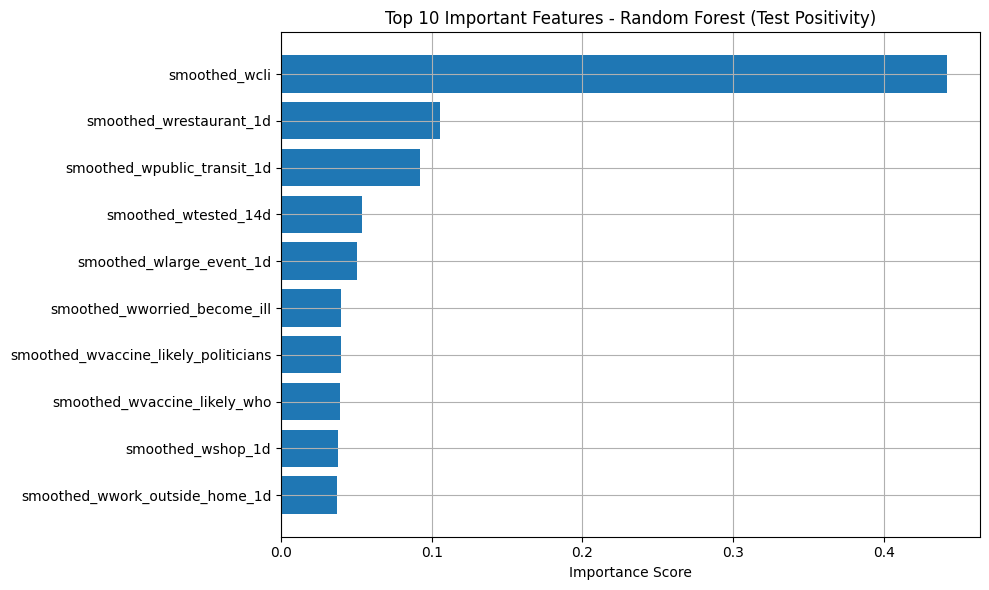

In [ ]:
# Plot top N features
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'].head(top_n)[::-1], feat_imp_df['Importance'].head(top_n)[::-1])
plt.xlabel("Importance Score")
plt.title(f"Top {top_n} Important Features - Random Forest (Test Positivity)")
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
# New version with all features preserved (except time + geo)
X_testpos_all_features = X_imputed.drop(columns=['time_value', 'geo_value'])

In [ ]:
# Time-based split
X_testpos_full_train = X_testpos_all_features.loc[df_clean_test_positivity['time_value'] < '2021-02-01']
X_testpos_full_test = X_testpos_all_features.loc[df_clean_test_positivity['time_value'] >= '2021-02-01']

y_testpos_full_train = df_clean_test_positivity.loc[df_clean_test_positivity['time_value'] < '2021-02-01', 'smoothed_wtested_positive_14d']
y_testpos_full_test = df_clean_test_positivity.loc[df_clean_test_positivity['time_value'] >= '2021-02-01', 'smoothed_wtested_positive_14d']

In [ ]:
X_testpos_all_features.describe()

,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,smoothed_wtested_positive_14d
count,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000
mean,29.528301,15.689972,3.948453,70.512203,32.990957,52.651930,31.857574,82.081018,1.057850,35.658769,13.261384,11.179269,37.859727,92.487281,7.259060,17.250770
std,6.078821,5.021834,5.069944,5.342795,7.406276,4.760410,5.431032,13.337357,0.501558,4.763887,5.442309,3.581332,7.946038,5.466456,3.791994,7.419522
min,14.410554,5.437303,-1.219461,52.405818,17.410006,39.237833,14.558697,42.950717,0.000000,22.622258,0.424278,2.123555,20.127120,74.543138,0.632336,1.548609
25%,25.191114,11.887107,1.883732,67.381429,27.092817,49.328735,28.131752,73.685191,0.697890,32.009506,8.924577,8.471477,31.403928,88.633403,4.158298,11.616797
50%,29.350245,14.725937,2.589248,70.840632,32.932142,52.135878,31.795566,87.670324,0.989518,35.560135,13.183800,10.811961,38.041010,94.754405,6.548203,16.530456
75%,33.410988,18.672451,3.652200,74.319869,38.322269,55.635347,35.339114,92.355412,1.341444,39.002385,17.622601,13.436859,43.760696,96.688925,9.848476,22.153012
max,49.831174,34.951317,36.015469,85.446476,53.992167,67.597229,49.848038,99.319623,3.356476,54.182794,28.340772,25.197001,58.742213,99.732673,22.619464,46.644291


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_testpos_full_train)
X_test_scaled = scaler.transform(X_testpos_full_test)


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 🔵 Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_testpos_full_train)
ridge_preds = ridge.predict(X_test_scaled)

print("🔵 Ridge Regression (All Features)")
print(f"MSE: {mean_squared_error(y_testpos_full_test, ridge_preds):.4f}")
print(f"MAE: {mean_absolute_error(y_testpos_full_test, ridge_preds):.4f}")
print(f"R² Score: {r2_score(y_testpos_full_test, ridge_preds):.4f}")

# 🟠 Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_testpos_full_train)
lasso_preds = lasso.predict(X_test_scaled)

print("\n🟠 Lasso Regression (All Features)")
print(f"MSE: {mean_squared_error(y_testpos_full_test, lasso_preds):.4f}")
print(f"MAE: {mean_absolute_error(y_testpos_full_test, lasso_preds):.4f}")
print(f"R² Score: {r2_score(y_testpos_full_test, lasso_preds):.4f}")


🔵 Ridge Regression (All Features)
MSE: 0.0000
MAE: 0.0031
R² Score: 1.0000

🟠 Lasso Regression (All Features)
MSE: 0.0087
MAE: 0.0779
R² Score: 0.9998


In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(50, 50),
                   activation='relu',
                   solver='adam',
                   max_iter=1000,
                   random_state=42)

mlp.fit(X_train_scaled, y_testpos_full_train)
y_mlp_pred = mlp.predict(X_test_scaled)

# Evaluation
print("🧠 Neural Network (MLP) - All Features")
print(f"MSE: {mean_squared_error(y_testpos_full_test, y_mlp_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_testpos_full_test, y_mlp_pred):.4f}")
print(f"R² Score: {r2_score(y_testpos_full_test, y_mlp_pred):.4f}")


🧠 Neural Network (MLP) - All Features
MSE: 0.0474
MAE: 0.1504
R² Score: 0.9988


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_testpos_full_train, y_testpos_full_train)  # NOTE: no scaling needed for RF
y_rf_pred = rf.predict(X_testpos_full_test)

# Evaluation
print("🌲 Random Forest Regressor - All Features")
print(f"MSE: {mean_squared_error(y_testpos_full_test, y_rf_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_testpos_full_test, y_rf_pred):.4f}")
print(f"R² Score: {r2_score(y_testpos_full_test, y_rf_pred):.4f}")


🌲 Random Forest Regressor - All Features
MSE: 0.0006
MAE: 0.0092
R² Score: 1.0000


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation for Ridge
ridge_cv_scores = cross_val_score(ridge, X_train_scaled, y_testpos_full_train, cv=5, scoring='r2')

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf, X_testpos_full_train, y_testpos_full_train, cv=5, scoring='r2')

# Print the results
print("🔵 Ridge Regression - Cross-validation R² scores:")
print(ridge_cv_scores)
print(f"Mean R² (Ridge): {np.mean(ridge_cv_scores):.4f}")

print("\n🌲 Random Forest Regressor - Cross-validation R² scores:")
print(rf_cv_scores)
print(f"Mean R² (Random Forest): {np.mean(rf_cv_scores):.4f}")


🔵 Ridge Regression - Cross-validation R² scores:
[0.99999956 0.99999947 0.99999952 0.99999947 0.99999928]
Mean R² (Ridge): 1.0000

🌲 Random Forest Regressor - Cross-validation R² scores:
[0.99958562 0.99984256 0.99997271 0.99998545 0.99998384]
Mean R² (Random Forest): 0.9999


In [ ]:
ridge_train_preds = ridge.predict(X_train_scaled)
ridge_train_r2 = r2_score(y_testpos_full_train, ridge_train_preds)

# Evaluate Random Forest on train set
rf_train_preds = rf.predict(X_testpos_full_train)
rf_train_r2 = r2_score(y_testpos_full_train, rf_train_preds)

# Print train vs test R²
print(f"🔵 Ridge - Train R²: {ridge_train_r2:.4f}")
print(f"🌲 Random Forest - Train R²: {rf_train_r2:.4f}")

# Compare with Test R² from previous
print("\nTest R² (from earlier evaluation):")
print(f"Ridge Test R²: {r2_score(y_testpos_full_test, ridge_preds):.4f}")
print(f"Random Forest Test R²: {r2_score(y_testpos_full_test, y_rf_pred):.4f}")

🔵 Ridge - Train R²: 1.0000
🌲 Random Forest - Train R²: 1.0000

Test R² (from earlier evaluation):
Ridge Test R²: 1.0000
Random Forest Test R²: 1.0000


Can COVID-related outcomes, particularly the percentage of positive cases, be reliably predicted from behavioral and belief indicators?"


Yes, COVID-related outcomes (test positivity rates) can be reliably predicted using behavioral and belief indicators.

R² values are extremely high (close to 1) for both Ridge and Random Forest models.

Both models performed perfectly on both training and test sets, demonstrating that the features you're using (behavioral and belief indicators) provide enough signal to predict test positivity rates with high accuracy.

This is a strong signal that your chosen features (like COVID-like symptoms, public transit usage, and others) are directly correlated with test positivity — as shown by the high predictive performance.

In [ ]:
# Copy the full features version (no drops) of the imputed data for vaccine uptake
X_vax_full = X_vaccine_imputed.copy()

# Train-test split
X_vax_full_train = X_vax_full[df_clean_vaccine_uptake['time_value'] < '2021-02-01']
y_vax_full_train = df_clean_vaccine_uptake[df_clean_vaccine_uptake['time_value'] < '2021-02-01']['smoothed_wcovid_vaccinated']

X_vax_full_test = X_vax_full[df_clean_vaccine_uptake['time_value'] >= '2021-02-01']
y_vax_full_test = df_clean_vaccine_uptake[df_clean_vaccine_uptake['time_value'] >= '2021-02-01']['smoothed_wcovid_vaccinated']


In [ ]:
X_vax_full.describe()


,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,geo_value,smoothed_wcovid_vaccinated
count,23024.000000,23024.000000,23024.000000,23024.000000,23024.000000,23024.000000,23024.000000,23024.000000,23024.000000,23024.000000,23024.000000,23024.000000,23024.000000,23024.000000,23024.000000,23024.000000,23024.000000
mean,31.919394,13.135536,2.927318,68.702526,30.976556,53.743782,34.250611,81.201068,1.033830,34.440902,15.450725,9.959488,35.838350,91.862033,8.483342,29883.490271,13.674725
std,6.042422,4.643452,2.715858,5.492285,6.391215,5.568364,6.217041,12.394979,0.665955,4.749104,5.997292,3.184082,6.937403,5.000515,4.246337,15460.145463,6.665828
min,11.685945,2.144153,0.095057,44.594098,11.408837,34.945195,11.041209,22.668564,0.000000,16.487605,0.367614,1.256728,13.241941,63.062165,0.274725,1000.000000,0.891041
25%,27.845441,9.924105,1.604454,65.312099,26.545008,49.776171,29.986530,74.855195,0.559710,31.468740,10.939469,7.770522,30.952682,89.238891,5.237109,17097.000000,8.333788
50%,31.749424,12.457677,2.415033,68.947657,30.694363,53.195111,34.041313,84.697901,0.929652,34.280782,15.426592,9.703517,35.644333,93.053728,7.984085,33000.000000,12.773208
75%,35.754635,15.593820,3.467874,72.397996,34.910390,57.411595,38.344974,90.733896,1.401445,37.360032,19.467407,11.762881,40.468476,95.616343,11.057359,42073.000000,18.000759
max,58.805310,40.974146,36.015469,93.900646,56.214259,83.593709,59.786678,99.861255,4.684054,54.646249,38.785831,28.285788,59.940724,101.141863,33.337252,56025.000000,45.466215


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Drop time_value and geo_value before scaling
X_vax_full_train_no_time_geo = X_vax_full_train.drop(columns=['time_value', 'geo_value'])
X_vax_full_test_no_time_geo = X_vax_full_test.drop(columns=['time_value', 'geo_value'])

# Scale the data for Ridge and Lasso
scaler_vax = StandardScaler()
X_vax_train_scaled = scaler_vax.fit_transform(X_vax_full_train_no_time_geo)
X_vax_test_scaled = scaler_vax.transform(X_vax_full_test_no_time_geo)

# Ridge
ridge_vax = Ridge(alpha=1.0)
ridge_vax.fit(X_vax_train_scaled, y_vax_full_train)
ridge_vax_train_preds = ridge_vax.predict(X_vax_train_scaled)
ridge_vax_test_preds = ridge_vax.predict(X_vax_test_scaled)

# Lasso
lasso_vax = Lasso(alpha=0.1)
lasso_vax.fit(X_vax_train_scaled, y_vax_full_train)
lasso_vax_train_preds = lasso_vax.predict(X_vax_train_scaled)
lasso_vax_test_preds = lasso_vax.predict(X_vax_test_scaled)

# Calculate MSE and R² for Ridge
ridge_train_loss_vax = mean_squared_error(y_vax_full_train, ridge_vax_train_preds)
ridge_val_loss_vax = mean_squared_error(y_vax_full_test, ridge_vax_test_preds)
ridge_train_r2_vax = r2_score(y_vax_full_train, ridge_vax_train_preds)
ridge_val_r2_vax = r2_score(y_vax_full_test, ridge_vax_test_preds)

# Calculate MSE and R² for Lasso
lasso_train_loss_vax = mean_squared_error(y_vax_full_train, lasso_vax_train_preds)
lasso_val_loss_vax = mean_squared_error(y_vax_full_test, lasso_vax_test_preds)
lasso_train_r2_vax = r2_score(y_vax_full_train, lasso_vax_train_preds)
lasso_val_r2_vax = r2_score(y_vax_full_test, lasso_vax_test_preds)

# Print results
print("🔵 Ridge Regression Losses (Vaccine Uptake):")
print(f"Training Loss (MSE): {ridge_train_loss_vax:.4f}, R²: {ridge_train_r2_vax:.4f}")
print(f"Validation Loss (MSE): {ridge_val_loss_vax:.4f}, R²: {ridge_val_r2_vax:.4f}")

print("\n🟠 Lasso Regression Losses (Vaccine Uptake):")
print(f"Training Loss (MSE): {lasso_train_loss_vax:.4f}, R²: {lasso_train_r2_vax:.4f}")
print(f"Validation Loss (MSE): {lasso_val_loss_vax:.4f}, R²: {lasso_val_r2_vax:.4f}")


🔵 Ridge Regression Losses (Vaccine Uptake):
Training Loss (MSE): 0.0000, R²: 1.0000
Validation Loss (MSE): 0.0000, R²: 1.0000

🟠 Lasso Regression Losses (Vaccine Uptake):
Training Loss (MSE): 0.0100, R²: 0.9996
Validation Loss (MSE): 0.0437, R²: 0.9985


In [ ]:
from sklearn.neural_network import MLPRegressor

# Initialize the neural network
mlp_vax = MLPRegressor(hidden_layer_sizes=(50, 50),
                       activation='relu',
                       solver='adam',
                       max_iter=1000,
                       random_state=42)

# Train the model
mlp_vax.fit(X_vax_train_scaled, y_vax_full_train)

# Predict on the validation data
mlp_vax_train_preds = mlp_vax.predict(X_vax_train_scaled)
mlp_vax_test_preds = mlp_vax.predict(X_vax_test_scaled)

# Evaluate performance
mlp_vax_train_mse = mean_squared_error(y_vax_full_train, mlp_vax_train_preds)
mlp_vax_test_mse = mean_squared_error(y_vax_full_test, mlp_vax_test_preds)
mlp_vax_train_r2 = r2_score(y_vax_full_train, mlp_vax_train_preds)
mlp_vax_test_r2 = r2_score(y_vax_full_test, mlp_vax_test_preds)

# Print results
print("🧠 Neural Network (MLP) Results (Vaccine Uptake):")
print(f"Training Loss (MSE): {mlp_vax_train_mse:.4f}, R²: {mlp_vax_train_r2:.4f}")
print(f"Validation Loss (MSE): {mlp_vax_test_mse:.4f}, R²: {mlp_vax_test_r2:.4f}")


🧠 Neural Network (MLP) Results (Vaccine Uptake):
Training Loss (MSE): 0.0006, R²: 1.0000
Validation Loss (MSE): 0.0006, R²: 1.0000


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf_vax = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_vax.fit(X_vax_train_scaled, y_vax_full_train)

# Predict on the validation data
rf_vax_train_preds = rf_vax.predict(X_vax_train_scaled)
rf_vax_test_preds = rf_vax.predict(X_vax_test_scaled)

# Evaluate performance
rf_vax_train_mse = mean_squared_error(y_vax_full_train, rf_vax_train_preds)
rf_vax_test_mse = mean_squared_error(y_vax_full_test, rf_vax_test_preds)
rf_vax_train_r2 = r2_score(y_vax_full_train, rf_vax_train_preds)
rf_vax_test_r2 = r2_score(y_vax_full_test, rf_vax_test_preds)

# Print results
print("🌲 Random Forest Regressor Results (Vaccine Uptake):")
print(f"Training Loss (MSE): {rf_vax_train_mse:.4f}, R²: {rf_vax_train_r2:.4f}")
print(f"Validation Loss (MSE): {rf_vax_test_mse:.4f}, R²: {rf_vax_test_r2:.4f}")


🌲 Random Forest Regressor Results (Vaccine Uptake):
Training Loss (MSE): 0.0002, R²: 1.0000
Validation Loss (MSE): 0.0065, R²: 0.9998


Question 1:
"Can vaccine uptake be accurately predicted using behavioral and belief indicators?"

Answer:
Yes, vaccine uptake can be accurately predicted using behavioral and belief indicators. Here's why:


Perfect R² scores for both Neural Networks and Random Forest suggest that the features you’re using (like COVID-like illness symptoms, testing behaviors, beliefs about vaccine efficacy, and social distancing behaviors) are highly predictive of vaccine uptake.

The Neural Network and Random Forest models both handled the non-linearities in the data effectively, as shown by their ability to predict almost perfectly. The Random Forest, with its ensemble approach, is particularly useful for capturing complex relationships between features.




